# HW 05: Use Decision Tree to Solve a Mystery in History

##### Chaithra Kopparam Cheluvaiah
##### SUID 326926205
##### ckoppara@syr.edu

In [78]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# DATA LOADING

In [96]:
papers = pd.read_csv('data-fedPapers85.csv')
papers.shape

(85, 72)

In [97]:
papers.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [98]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    85 non-null     object 
 1   filename  85 non-null     object 
 2   a         85 non-null     float64
 3   all       85 non-null     float64
 4   also      85 non-null     float64
 5   an        85 non-null     float64
 6   and       85 non-null     float64
 7   any       85 non-null     float64
 8   are       85 non-null     float64
 9   as        85 non-null     float64
 10  at        85 non-null     float64
 11  be        85 non-null     float64
 12  been      85 non-null     float64
 13  but       85 non-null     float64
 14  by        85 non-null     float64
 15  can       85 non-null     float64
 16  do        85 non-null     float64
 17  down      85 non-null     float64
 18  even      85 non-null     float64
 19  every     85 non-null     float64
 20  for       85 non-null     float64


In [99]:
freq_words = papers.groupby('author')
freq_words.sum()

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
author,,,,,,,,,,,,,,,,,,,,,
HM,0.640,0.128,0.018,0.141,1.592,0.054,0.247,0.240,0.133,0.200,...,0.342,0.142,0.007,0.047,0.412,0.142,0.050,0.291,0.077,0.000
Hamilton,16.096,2.742,0.244,4.121,17.314,2.384,3.700,6.004,2.490,15.727,...,1.051,0.890,0.695,0.625,8.185,1.679,4.712,4.027,6.259,0.106
Jay,0.799,0.180,0.099,0.126,3.576,0.188,0.426,0.784,0.180,1.377,...,0.124,0.144,0.092,0.105,0.493,0.258,0.630,0.475,0.626,0.032
Madison,4.047,0.830,0.166,0.892,6.295,0.447,1.123,2.011,0.443,4.343,...,0.386,0.313,0.174,0.090,2.457,0.398,1.600,1.156,0.910,0.034
dispt,3.343,0.611,0.124,0.533,3.916,0.464,1.055,1.518,0.517,3.951,...,0.293,0.230,0.125,0.131,1.862,0.288,1.393,0.824,0.774,0.000


In [105]:
temp_df = papers[papers['author']!='dispt']
X_train = temp_df.iloc[:,2:]
X_train.head()

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
11,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,0.065,0.315,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,0.065,0.258,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,0.088,0.271,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,0.015,0.376,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,0.115,0.211,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [106]:
Y_train = temp_df['author']
Y_train

11    Hamilton
12    Hamilton
13    Hamilton
14    Hamilton
15    Hamilton
        ...   
80     Madison
81     Madison
82     Madison
83     Madison
84     Madison
Name: author, Length: 74, dtype: object

In [120]:
# Testing data
test = papers[papers['author']=='dispt']
X_test = test.iloc[:,2:]

In [110]:
X_train.shape

(74, 70)

In [111]:
X_test.shape

(11, 70)

In [119]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,Y_train)

# predicting on test data
pred=clf.predict(X_test)
pred

array(['Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', 'Madison', 'Madison'],
      dtype=object)

[Text(0.7142857142857143, 0.9, 'X[59] <= 0.019\ngini = 0.478\nsamples = 74\nvalue = [3, 51, 5, 15]'),
 Text(0.5714285714285714, 0.7, 'X[4] <= 0.595\ngini = 0.549\nsamples = 24\nvalue = [3, 1, 5, 15]'),
 Text(0.42857142857142855, 0.5, 'X[36] <= 0.061\ngini = 0.349\nsamples = 19\nvalue = [3, 1, 0, 15]'),
 Text(0.2857142857142857, 0.3, 'X[58] <= 0.022\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.42857142857142855, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.5714285714285714, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15]'),
 Text(0.7142857142857143, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]'),
 Text(0.8571428571428571, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [0, 50, 0, 0]')]

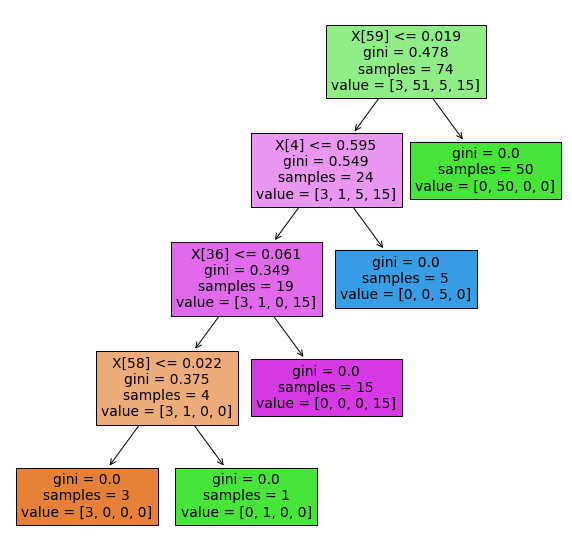

In [115]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)

In [118]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2997930362795228


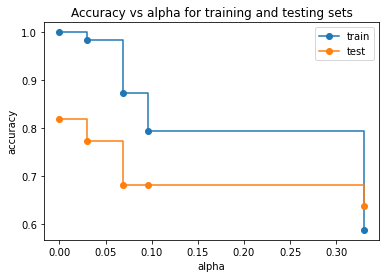

In [62]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [66]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.12)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.12, random_state=0)

In [67]:
pred=clf.predict(X_test)
accuracy_score(Y_test, pred)

0.6818181818181818

[Text(0.5, 0.75, 'X[59] <= 0.019\ngini = 0.594\nsamples = 63\nvalue = [1, 37, 5, 13, 7]'),
 Text(0.25, 0.25, 'gini = 0.639\nsamples = 26\nvalue = [1, 0, 5, 13, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0, 0, 0]')]

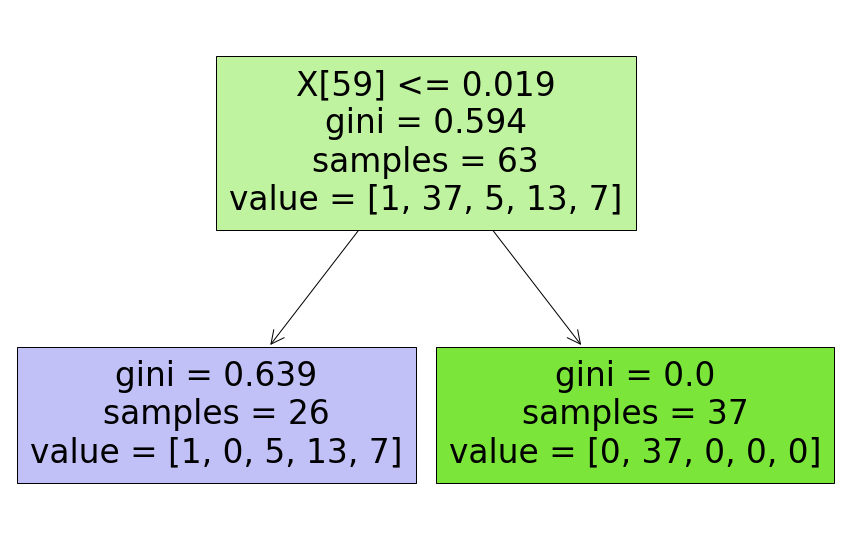

In [73]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [121]:
print(tree.export_text(clf))

|--- feature_59 <= 0.02
|   |--- feature_4 <= 0.60
|   |   |--- feature_36 <= 0.06
|   |   |   |--- feature_58 <= 0.02
|   |   |   |   |--- class: HM
|   |   |   |--- feature_58 >  0.02
|   |   |   |   |--- class: Hamilton
|   |   |--- feature_36 >  0.06
|   |   |   |--- class: Madison
|   |--- feature_4 >  0.60
|   |   |--- class: Jay
|--- feature_59 >  0.02
|   |--- class: Hamilton

